In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sn
import torch
import os
from pathlib import Path
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/castanet/Git/deep-soli/net/')

from net import CNNModel_3

# Model architecture

In [24]:
print(CNNModel_3(11))

# lr = 10e-6

CNNModel_3(
  (conv_layer1): Sequential(
    (0): Conv3d(4, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): ReLU()
  )
  (conv_layer2): Sequential(
    (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): ReLU()
  )
  (conv_layer3): Sequential(
    (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): ReLU()
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=367744, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=11, bias=True)
  (relu): ReLU()
  (batch): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)


# Load model

In [22]:
path = "/home/castanet/Git/deep-soli"
folder = "res_16_7_2020/CNN3_cross_val_2"
res_path = f"{path}/res/{folder}"

folds_train_loss = []
folds_test_loss = []
folds_train_accuracy = []
folds_test_accuracy = []
conf = torch.zeros((5,11,11))

for i in range(5):

    conf[i] = torch.load(f"{res_path}/res_{i+1}/conf_matr")
    folds_train_loss.append(torch.load(f"{res_path}/res_{i+1}/train_loss"))
    folds_test_loss.append(torch.load(f"{res_path}/res_{i+1}/test_loss"))
    folds_train_accuracy.append(torch.load(f"{res_path}/res_{i+1}/train_acc"))
    folds_test_accuracy.append(torch.load(f"{res_path}/res_{i+1}/test_acc",))
    
acc_matr_conf = torch.sum(conf,0)
matr_conf = acc_matr_conf/acc_matr_conf.sum(1)

/home/castanet/Git/deep-soli/notebooks/CNN3D_deep


# Train/test accuracy/loss per fold

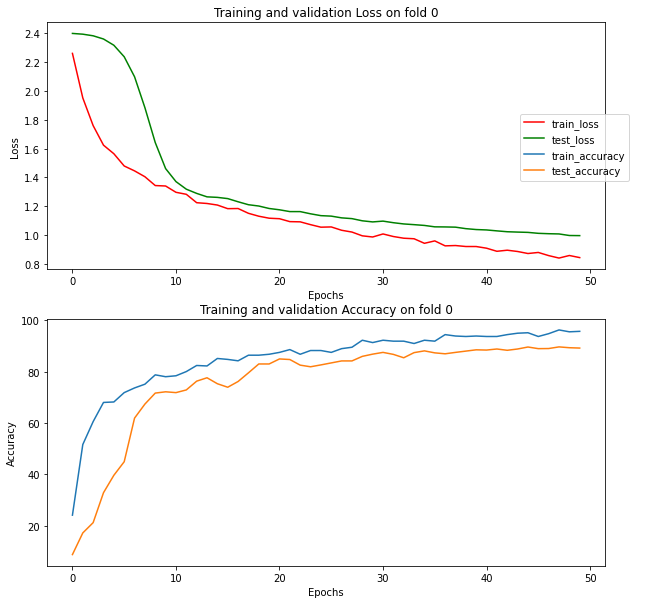

In [25]:
fig, [ax,bx] = plt.subplots(2,1, figsize=(10,10))

fold = 0

x = np.arange(50)

a, = ax.plot(x, folds_train_loss[fold],color="red", label="train_loss")
b, = ax.plot(x, folds_test_loss[fold],color="green", label="test_loss")
ax.set(xlabel='Epochs',ylabel='Loss')
ax.set_title(f"Training and validation Loss on fold {fold}")

# plot accuracy

c, = bx.plot(x, folds_train_accuracy[fold], label = 'train_accuracy')
d, = bx.plot(x, folds_test_accuracy[fold], label = 'test_accuracy')
bx.set_title(f"Training and validation Accuracy on fold {fold}")
bx.set(xlabel='Epochs',ylabel='Accuracy')

plt.figlegend((a,b,c,d),("train_loss","test_loss",'train_accuracy','test_accuracy'), loc=(0.8, 0.7))


# Global confusion matrix

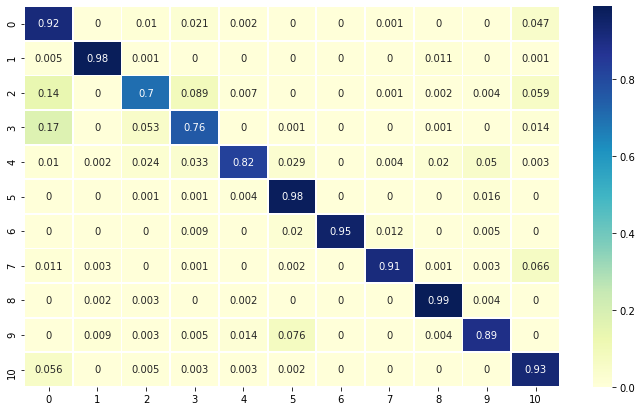

In [26]:
fig, ax = plt.subplots(figsize=(12,7)) 
ax = sn.heatmap(matr_conf, annot=True, linewidths = .8, cmap="YlGnBu")
plt.show()